Text(0.5, 1.0, 'f(x)')

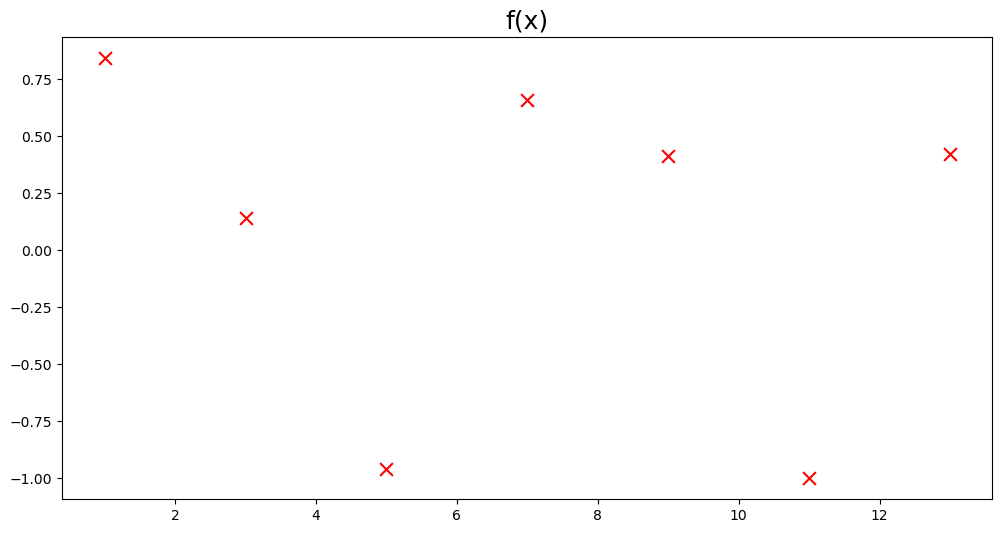

In [4]:
import numpy as np
from matplotlib import pylab
from scipy import interpolate
x = np.linspace(1.0, 13.0, 7)
y = np.sin(x)
pylab.figure(figsize = (12,6))
pylab.scatter(x,y, s = 85, marker='x', color = 'r')
pylab.title(u'f(x)', fontsize = 18)

Text(0.5, 1.0, 'Interpolation')

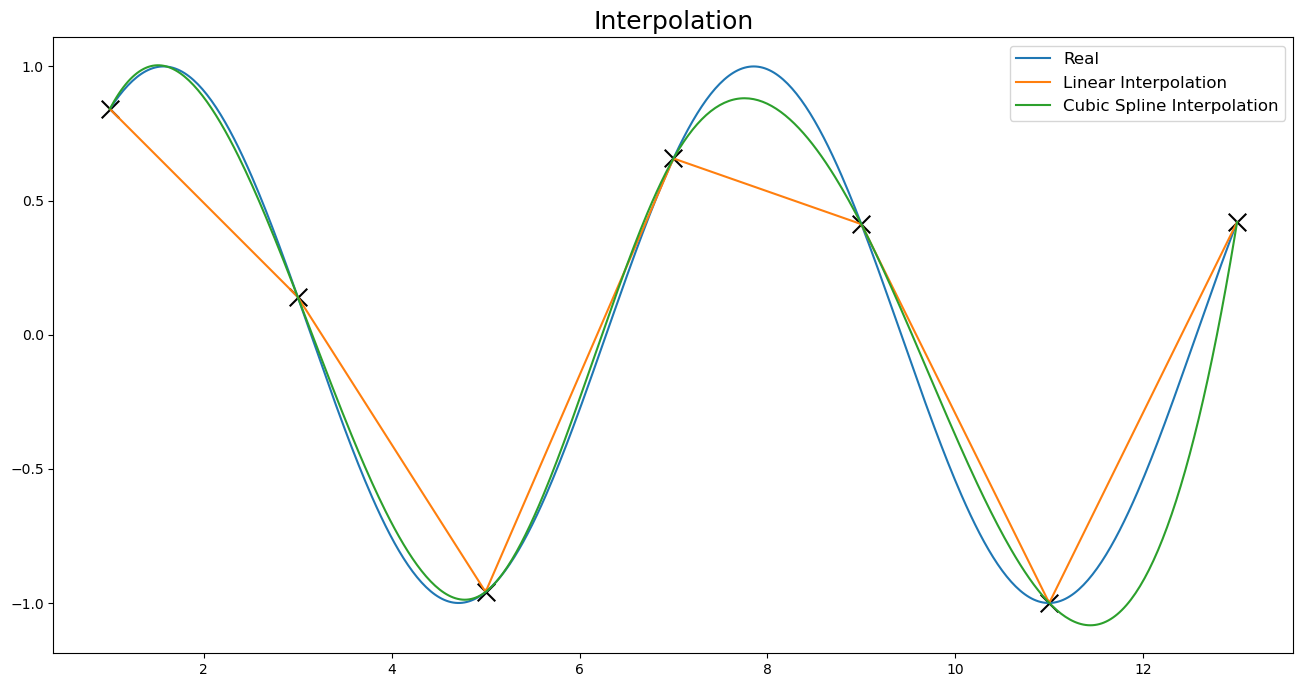

In [6]:
xnew = np.linspace(1.0,13.0,500)
ynewLinear = interpolate.interp1d(x,y,kind='linear')(xnew)
ynewCubicSpline = interpolate.interp1d(x,y,kind='cubic')(xnew)
ynewReal = np.sin(xnew)
pylab.figure(figsize = (16,8))
pylab.plot(xnew,ynewReal)
pylab.plot(xnew,ynewLinear)
pylab.plot(xnew,ynewCubicSpline)
pylab.scatter(x,y, s = 160, marker='x', color = 'k')
pylab.legend(['Real','Linear Interpolation','Cubic Spline Interpolation'], loc = 'upper right', fontsize = 12)
pylab.title(u'Interpolation', fontsize = 18)

In [8]:
import pandas as pd
from datetime import datetime as Date
pd.options.display.float_format = '{:,>.2f}'.format
dates = [Date(2015,3,25), Date(2015,4,25), Date(2015,6,25), Date(2015,9,25)]
strikes = [2.2, 2.3, 2.4, 2.5, 2.6]
blackVolMatrix = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])
table = pd.DataFrame(blackVolMatrix * 100, index = strikes, columns = dates, )
table.index.name = u'Strike Price'
table.columns.name = u'Expiration Date'
table

Expiration Date,2015-03-25,2015-04-25,2015-06-25,2015-09-25
Strike Price,,,,
2.20,32.56,29.75,29.26,27.68
2.30,28.84,29.20,27.39,26.51
2.40,27.66,27.35,25.89,25.28
2.50,26.97,25.57,25.80,25.41
2.60,27.77,24.82,27.34,24.81


In [9]:
evaluation_date = Date(2015,3,3)
ttm = np.array([(d - evaluation_date).days / 365.0 for d in dates])
variances = np.array(blackVolMatrix) ** 2 * ttm
variances

array([[0.00639109, 0.0128489 , 0.02674114, 0.04324205],
       [0.0050139 , 0.01237794, 0.02342277, 0.03966943],
       [0.00461125, 0.01086231, 0.02093128, 0.03607931],
       [0.00438413, 0.0094909 , 0.02079521, 0.03643376],
       [0.00464918, 0.00894747, 0.02334717, 0.03475378]])

In [21]:
interp = interpolate.RegularGridInterpolator((ttm, strikes), variances.T, method='linear')
sMeshes = np.linspace(strikes[0], strikes[-1], 400)
tMeshes = np.linspace(ttm[0], ttm[-1], 200)
interpolatedVarianceSurface = np.zeros((len(sMeshes), len(tMeshes)))
for i, s in enumerate(sMeshes):
    for j, t in enumerate(tMeshes):
        interpolatedVarianceSurface[i][j] = interp((t,s))

interpolatedVolatilitySurface = np.sqrt((interpolatedVarianceSurface / tMeshes))

Text(0.5, 1.0, '2015/3/3')

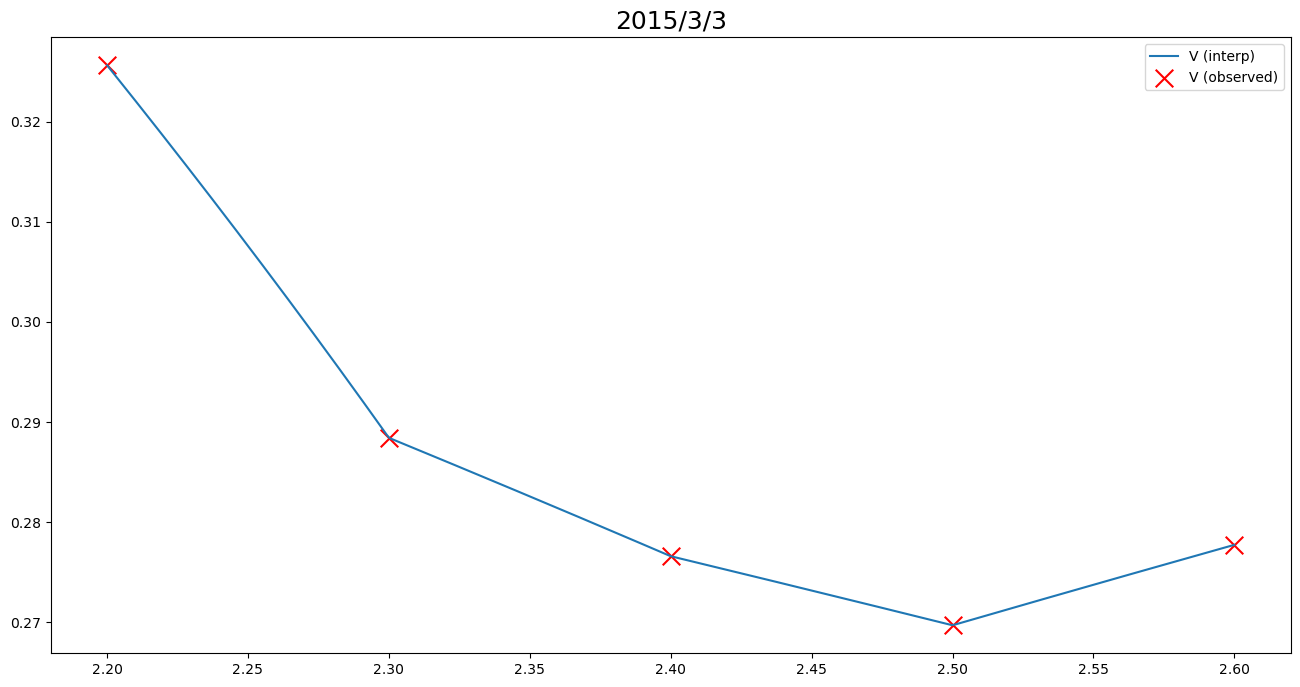

In [23]:
pylab.figure(figsize = (16,8))
pylab.plot(sMeshes, interpolatedVolatilitySurface[:, 0])
pylab.scatter(x = strikes, y = blackVolMatrix[:,0], s = 160,marker = 'x', color = 'r')
pylab.legend([u'V (interp)', u'V (observed)'], loc='best')
pylab.title(u'2015/3/3', fontsize = 18)

Text(0.5, 0, 'volatility(%)')

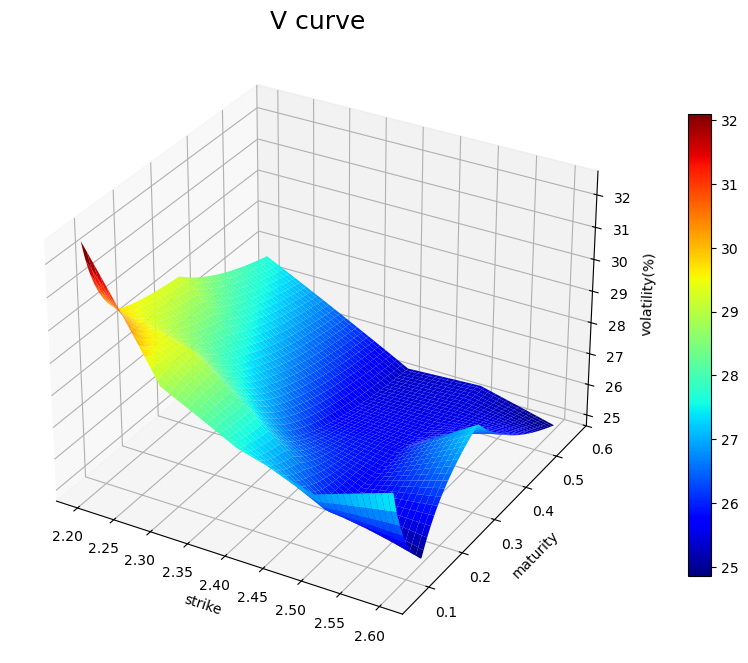

In [ ]:
from matplotlib import cm
maturityMeshes, strikeMeshes = np.meshgrid(tMeshes, sMeshes)
pylab.figure(figsize = (16,8))
ax = pylab.subplot(111, projection='3d')
surface = ax.plot_surface(strikeMeshes, maturityMeshes, interpolatedVolatilitySurface*100, cmap = cm.jet)
pylab.colorbar(surface,shrink=0.75)
pylab.title(u'V curve', fontsize = 18)
pylab.xlabel("strike")
pylab.ylabel("maturity")
ax.set_zlabel(r"volatility(%)")